<a href="https://colab.research.google.com/github/datadigger01/inter_trade/blob/master/DeepLearning(LSTM_Forecasting).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.  LSTM Model for TimeSeries Forecasting

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # to draw graphs
%matplotlib inline

In [ ]:
# API 설치
!pip install -U finance-datareader

In [147]:
# 불러오기기
import FinanceDataReader as fdr
#import datetime

#start = datetime.datetime(2016, 2, 19)
#end = datetime.datetime(2016, 3, 4)

In [148]:
# 대상종목 선정

# KOSPI Index 코스피 지수
df_kospi = fdr.DataReader('KS11', '2019') # 20## ~ 현재
df_kospi

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,2050.550049,2053.449951,2004.270020,2010.000000,2010.000000,326400
2019-01-03,2011.810059,2014.719971,1991.650024,1993.699951,1993.699951,428000
2019-01-04,1992.400024,2011.560059,1984.530029,2010.250000,2010.250000,409000
2019-01-07,2034.239990,2048.060059,2030.900024,2037.099976,2037.099976,440200
2019-01-08,2038.680054,2042.699951,2023.589966,2025.270020,2025.270020,397800
...,...,...,...,...,...,...
2023-10-13,2460.850098,2466.620117,2452.830078,2456.149902,2456.149902,582400
2023-10-16,2442.429932,2453.770020,2422.520020,2436.239990,2436.239990,788400
2023-10-17,2454.139893,2466.870117,2449.419922,2460.169922,2460.169922,508800


In [149]:
forecast_period = 60

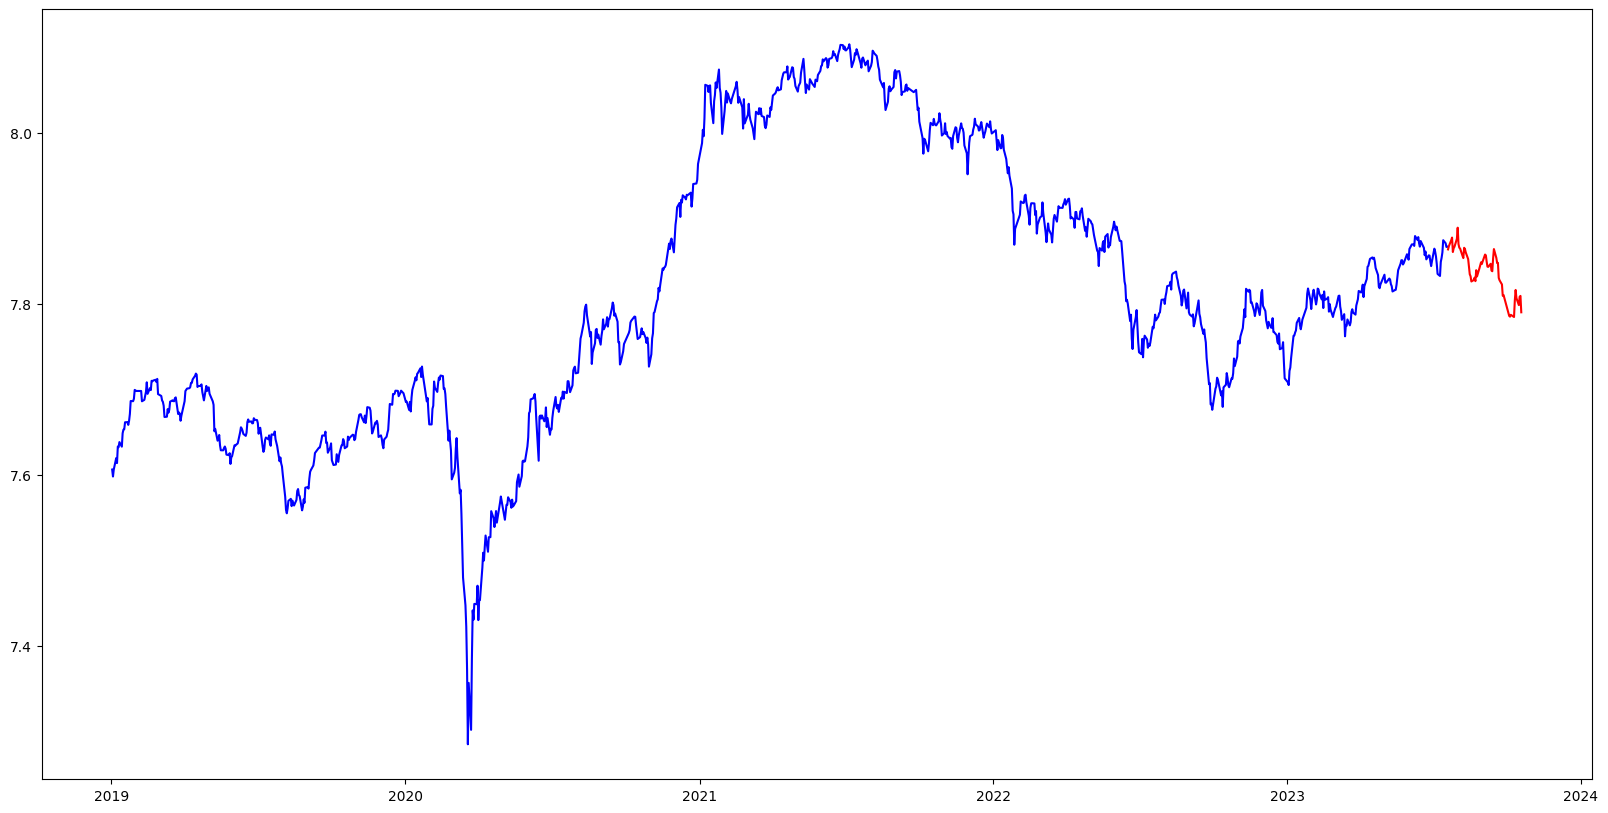

In [150]:
plt.figure(figsize=(20,10))
plt.plot(np.log(df_kospi.iloc[:-forecast_period,3:4]),'b')
plt.plot(np.log(df_kospi.iloc[-forecast_period:,3:4]),'r')

#plt.plot(stk_data.loc[:,('AMZN')], 'r')
plt.show()

In [151]:
training_set = np.log(df_kospi.iloc[:-forecast_period, 3:4].values)
test_set = np.log(df_kospi.iloc[-forecast_period:, 3:4].values)

print("train_set:",training_set.shape)
print("test_Set:",test_set.shape)

train_set: (1122, 1)
test_Set: (60, 1)


In [152]:
from sklearn.preprocessing import MinMaxScaler

In [153]:
# Feature Scaling(표준화/정규화)
sc = MinMaxScaler(feature_range = (0, 1))

training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 1122):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

print("X_train",X_train.shape)
#(1122, 30, 1)
print("y_train",y_train.shape)

X_train (1062, 60, 1)
y_train (1062,)


In [154]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *

## LSTM 모델 구성

In [173]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 60, 50)            10400     
                                                                 
 dropout_20 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_21 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_21 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_22 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_22 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_23 (LSTM)              (None, 50)               

In [179]:
# Fitting the RNN(LSTM) to the Training set
model.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
34/34 [==============================] - 4s 119ms/step - loss: 0.0055
Epoch 2/50
34/34 [==============================] - 6s 177ms/step - loss: 0.0046
Epoch 3/50
34/34 [==============================] - 4s 118ms/step - loss: 0.0053
Epoch 4/50
34/34 [==============================] - 4s 120ms/step - loss: 0.0042
Epoch 5/50
34/34 [==============================] - 6s 171ms/step - loss: 0.0042
Epoch 6/50
34/34 [==============================] - 4s 120ms/step - loss: 0.0042
Epoch 7/50
34/34 [==============================] - 4s 117ms/step - loss: 0.0046
Epoch 8/50
34/34 [==============================] - 5s 154ms/step - loss: 0.0038
Epoch 9/50
34/34 [==============================] - 5s 139ms/step - loss: 0.0036
Epoch 10/50
34/34 [==============================] - 4s 116ms/step - loss: 0.0041
Epoch 11/50
34/34 [==============================] - 5s 134ms/step - loss: 0.0036
Epoch 12/50
34/34 [==============================] - 5s 160ms/step - loss: 0.0036
Epoch 13/50
34/34 [======

In [180]:
# Getting the predicted stock price
dataset_train = np.log(df_kospi.iloc[:-forecast_period, 3:4])
dataset_test = np.log(df_kospi.iloc[-forecast_period:, 3:4])
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)

# Test Set Setting for prediction
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 120):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (60, 60, 1)

(60, 60, 1)


In [181]:
# 예측수행
predicted_stock_price = model.predict(X_test)
# 예측값 변환
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
#predicted_stock_price

2/2 [==============================] - 0s 50ms/step


In [182]:
pred_log_value = pd.DataFrame(predicted_stock_price, columns=['pred_log_price'])

real_log_price = dataset_test.reset_index()
result = pd.concat([real_log_price, pred_log_value], axis=1)
result

,Date,Close,pred_log_price
0,2023-07-20,7.863355,7.845073
1,2023-07-21,7.867014,7.848549
2,2023-07-24,7.874180,7.850429
3,2023-07-25,7.877192,7.851391
4,2023-07-26,7.860324,7.852174
5,2023-07-27,7.864731,7.852197
6,2023-07-28,7.866462,7.851355
7,2023-07-31,7.875720,7.849978
8,2023-08-01,7.888736,7.848982
9,2023-08-02,7.869581,7.849596


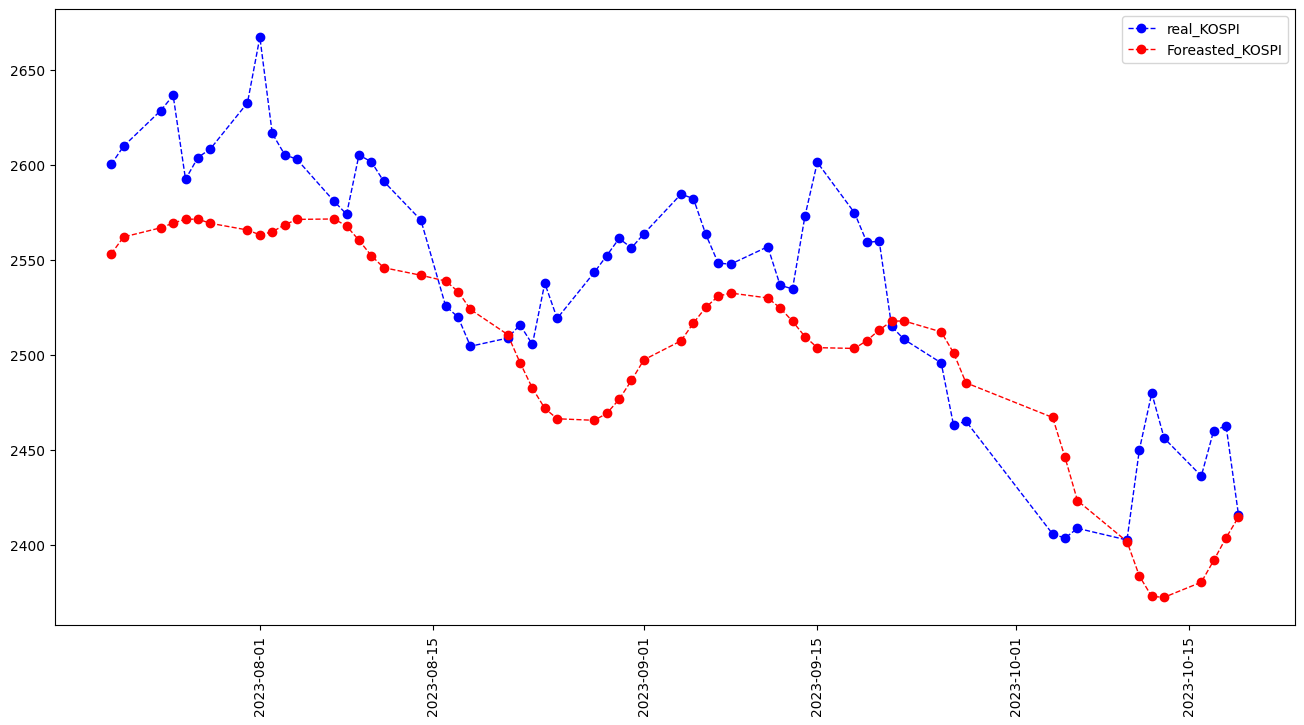

In [183]:
plt.figure(figsize=(16,8))
plt.plot(result.Date, np.exp(result['Close']),marker='o',markersize=6,color='blue', linestyle='dashed', linewidth=1,label='real_KOSPI')
plt.plot(result.Date, np.exp(result['pred_log_price']),marker='o',markersize=6,color='red', linestyle='dashed', linewidth=1, label='Foreasted_KOSPI')

plt.legend()
plt.xticks(rotation=90)
plt.show()